# Insurance Fraud Detection

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset

data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16/Automobile_insurance_fraud.csv")

In [3]:
# check the first five sample data

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

## Data Cleansing

In [5]:
#checking the missing values

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
# Since the features 'collison_type','property_damage' and 'police_report_available' have three unique values

print('Collision type unique values counts :' '\n' '%s' % data.collision_type.value_counts())
print('Property damage unique values counts :' '\n' '%s' % data.property_damage.value_counts())
print('Property report unique values counts :' '\n' '%s' % data.police_report_available.value_counts())

Collision type unique values counts :
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
Property damage unique values counts :
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
Property report unique values counts :
NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


In [7]:
# replace all the '?' with the mode of the categorical variable

data.collision_type.replace("?", "Rear Collision",inplace=True)
data.property_damage.replace("?", "NO",inplace=True)
data.police_report_available.replace("?", "NO",inplace=True)
print('Collision type unique values counts :' '\n' '%s' % data.collision_type.value_counts())
print('Property damage unique values counts :' '\n' '%s' % data.property_damage.value_counts())
print('Property report unique values counts :' '\n' '%s' % data.police_report_available.value_counts())

Collision type unique values counts :
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Property damage unique values counts :
NO     698
YES    302
Name: property_damage, dtype: int64
Property report unique values counts :
NO     686
YES    314
Name: police_report_available, dtype: int64


In [8]:
# Since feature c_39 has 0 values and info, we can drop this column

data=data.drop(labels='_c39',axis=1)

In [9]:
# Lets drop some features which are not so important for the modelling

data=data.drop(labels=['policy_number', 'policy_bind_date','policy_state','insured_zip','insured_hobbies','incident_date','incident_state', 'incident_city',
                      'incident_location', 'incident_hour_of_the_day','auto_make','auto_model', 'auto_year'],axis=1)

In [10]:
data.shape

(1000, 26)

## EDA

#### Univariate Analysis

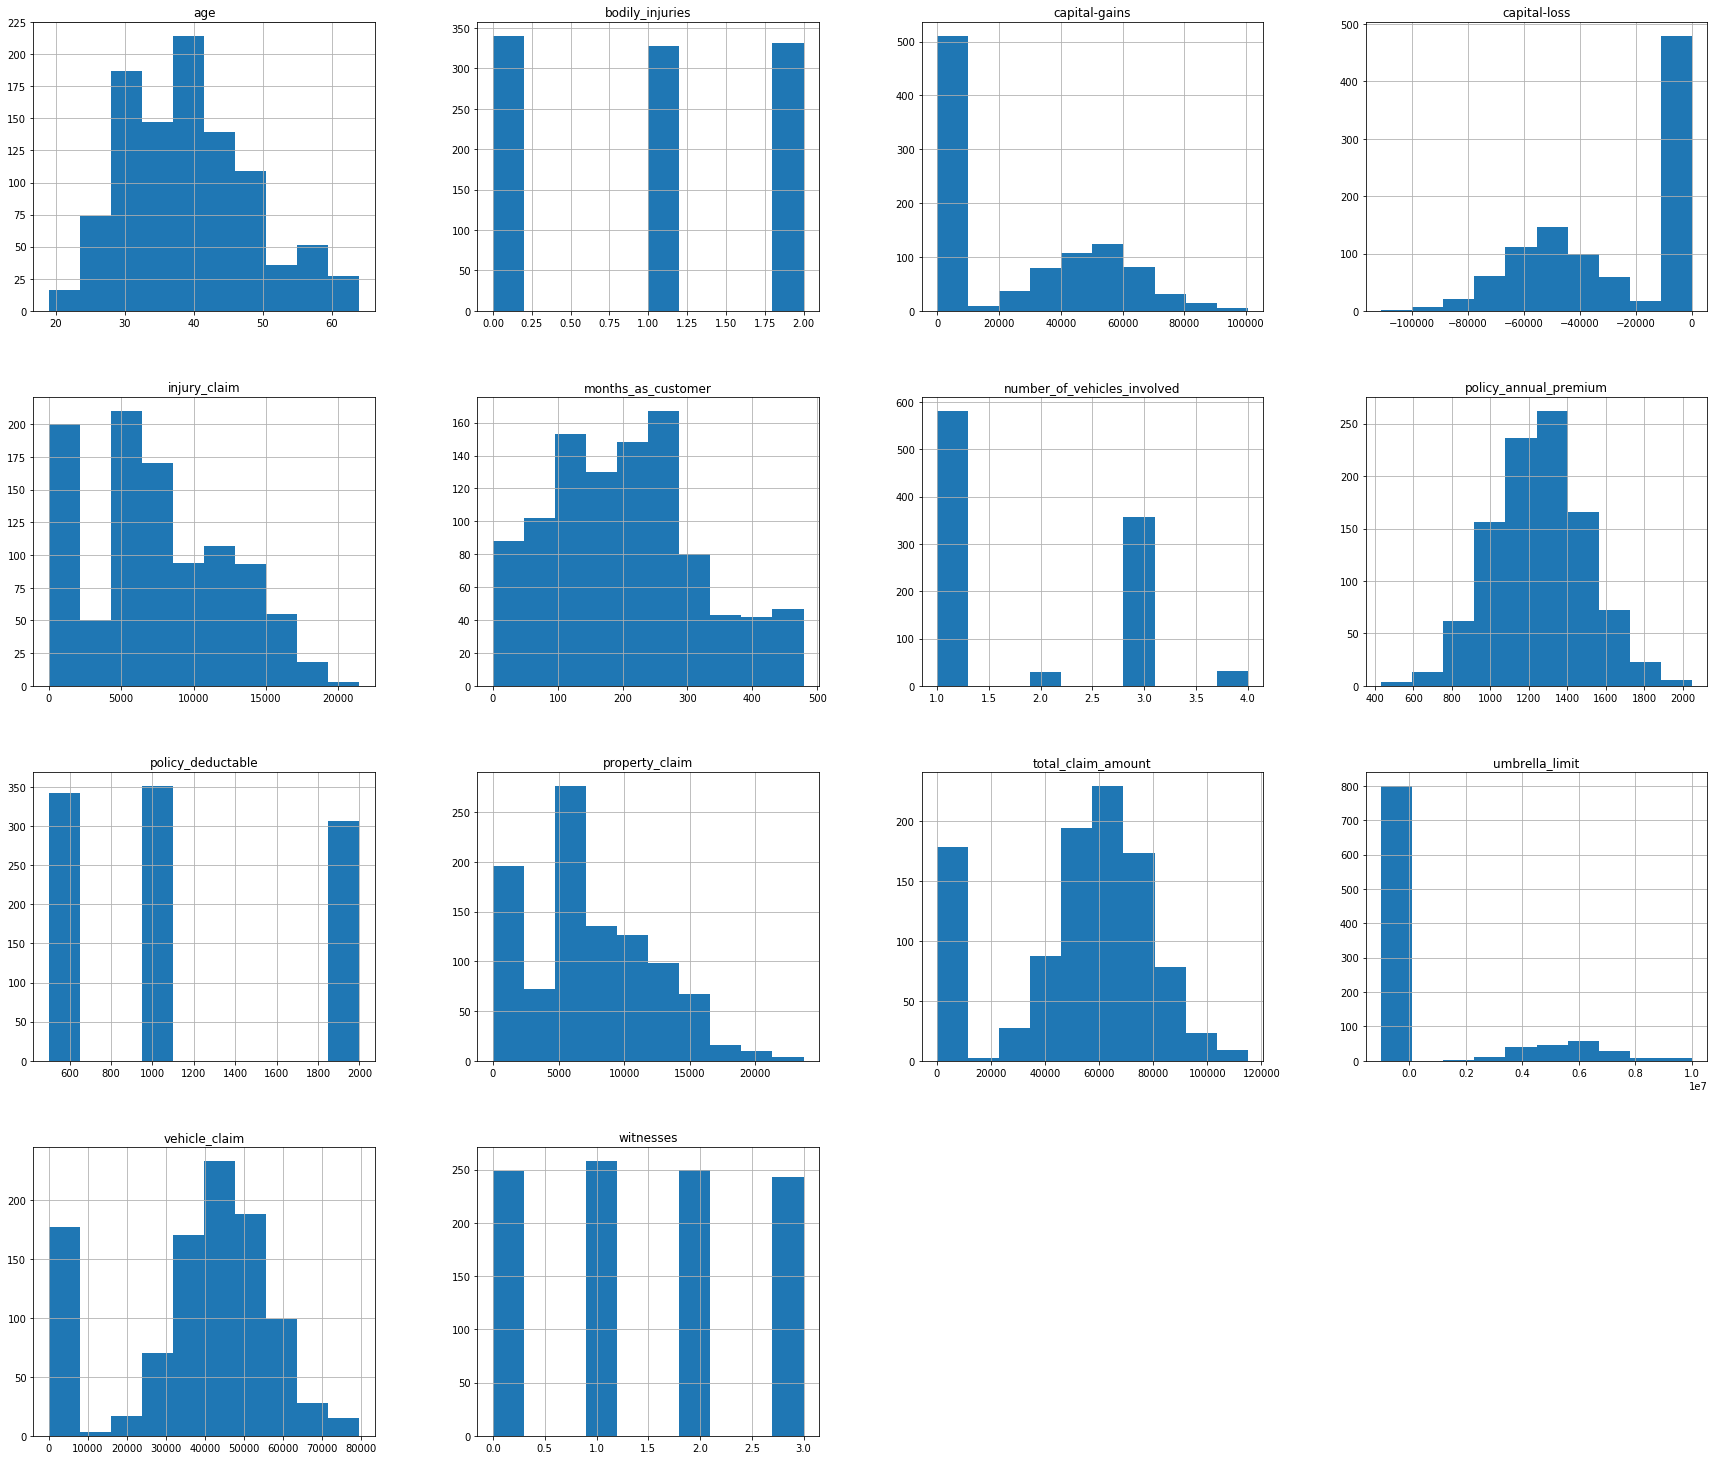

In [11]:
# Univariate Analysis

data.hist(figsize=(30,26))
plt.show()

#### By this, we can easily deduce that the features like age, capital_loss, capital_gains , total_claim_amount, vahicle_claims etc are normally distributed

In [12]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

#### Bivariate Analysis between feature and target

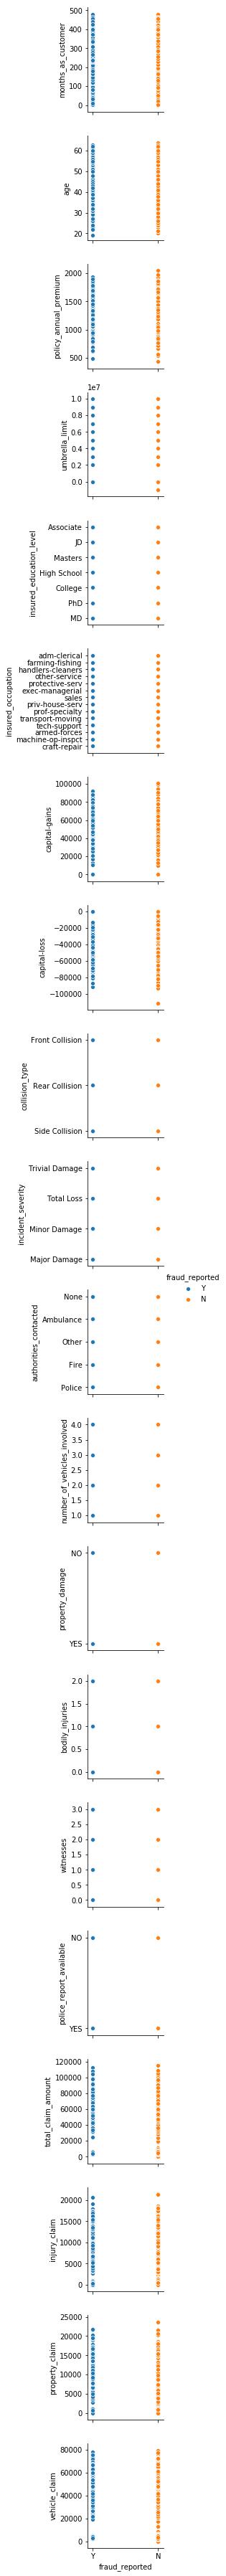

In [13]:
# Bivariate Analysis

sns.pairplot(data,y_vars=['months_as_customer', 'age','policy_annual_premium', 'umbrella_limit','insured_education_level',
                          'insured_occupation','capital-gains', 'capital-loss','collision_type', 'incident_severity',
                          'authorities_contacted','number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
                          'witnesses', 'police_report_available', 'total_claim_amount','injury_claim', 'property_claim',
                          'vehicle_claim'],x_vars='fraud_reported',hue='fraud_reported')

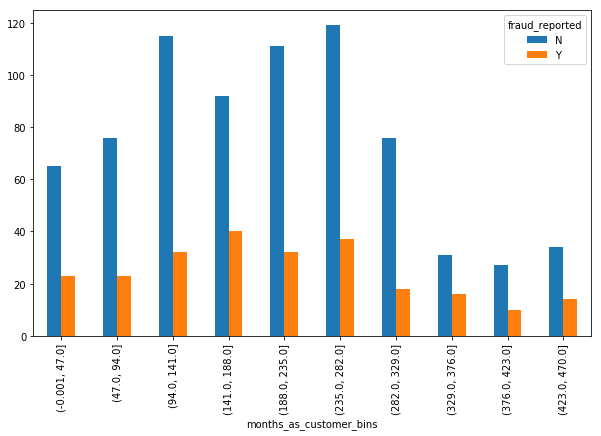

In [14]:
#bins = [0,0.35,0.7,1]
bins = range(0,data['months_as_customer'].max(),int(data['months_as_customer'].max()/10))
data['months_as_customer_bins'] = pd.cut(data.months_as_customer,bins=bins,include_lowest = True)
pd.crosstab(data.months_as_customer_bins,data.fraud_reported).plot(kind = 'bar', figsize = (10,6))

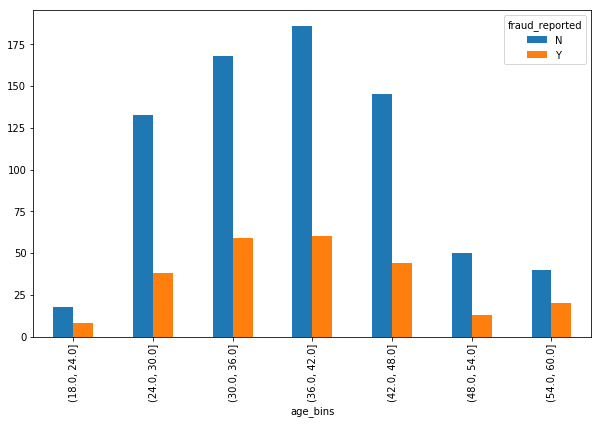

In [15]:
bins = range(0,data['age'].max(),int(data['age'].max()/10))
data['age_bins'] = pd.cut(data.age,bins=bins,include_lowest = True)
pd.crosstab(data.age_bins,data.fraud_reported).plot(kind = 'bar', figsize = (10,6))

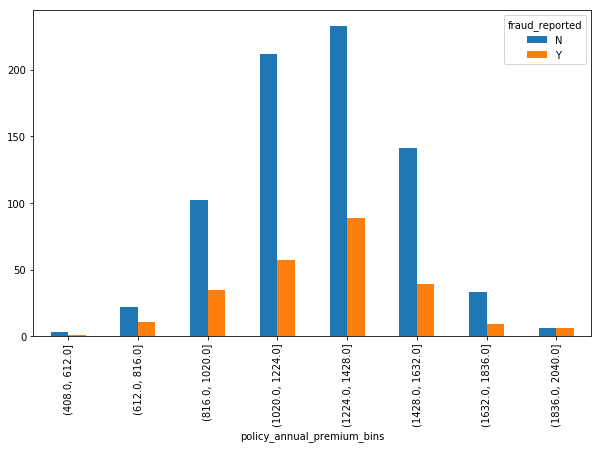

In [16]:
bins=range(0,int(data.policy_annual_premium.max()),int(int(data['policy_annual_premium'].max())/10))
data['policy_annual_premium_bins']=pd.cut(data.policy_annual_premium,bins=bins,include_lowest = True)
pd.crosstab(data.policy_annual_premium_bins,data.fraud_reported).plot(kind = 'bar', figsize = (10,6))

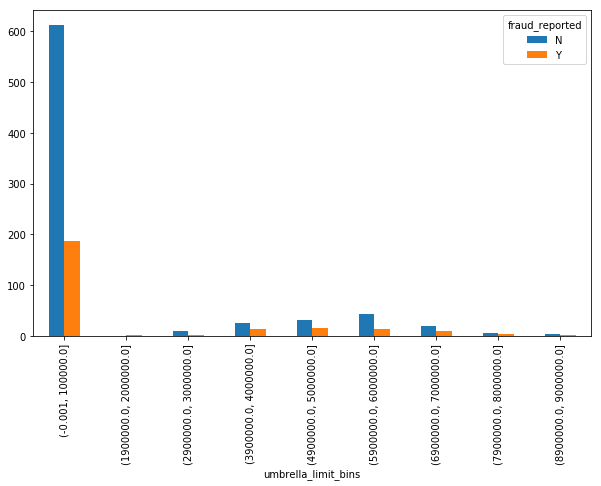

In [17]:
bins=range(0,data.umbrella_limit.max(),int(data.umbrella_limit.max()/100))
data['umbrella_limit_bins']=pd.cut(data.umbrella_limit,bins=bins,include_lowest=True)
pd.crosstab(data.umbrella_limit_bins,data.fraud_reported).plot(kind='bar', figsize = (10,6))

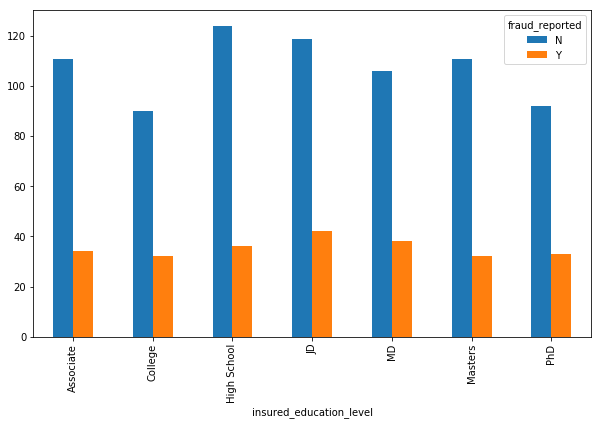

In [18]:
pd.crosstab(data.insured_education_level,data.fraud_reported).plot(kind='bar',figsize=(10,6))

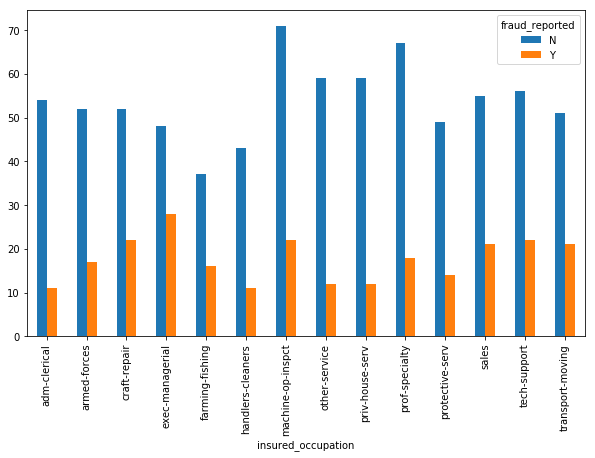

In [19]:
pd.crosstab(data.insured_occupation,data.fraud_reported).plot(kind='bar',figsize=(10,6))

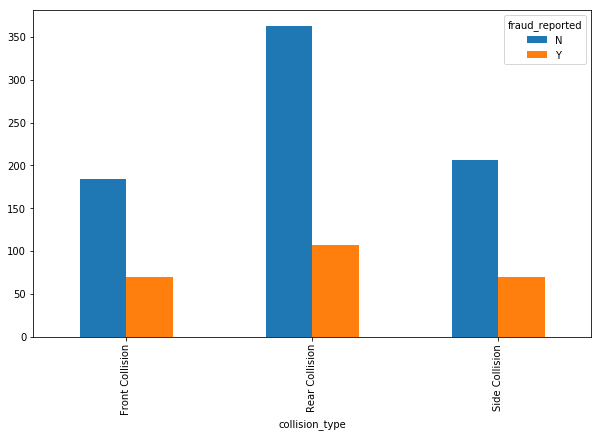

In [20]:
pd.crosstab(data.collision_type,data.fraud_reported).plot(kind='bar',figsize=(10,6))

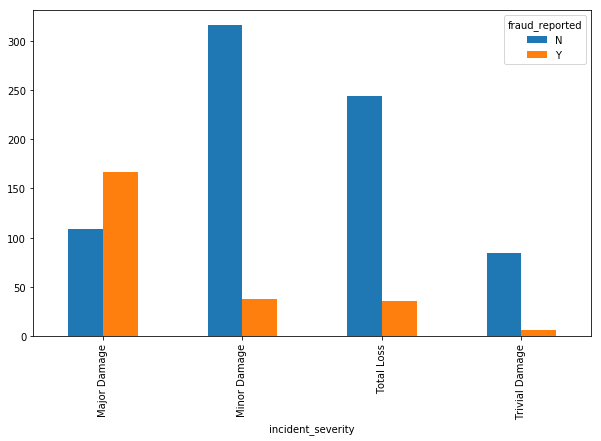

In [21]:
pd.crosstab(data.incident_severity,data.fraud_reported).plot(kind='bar',figsize=(10,6))

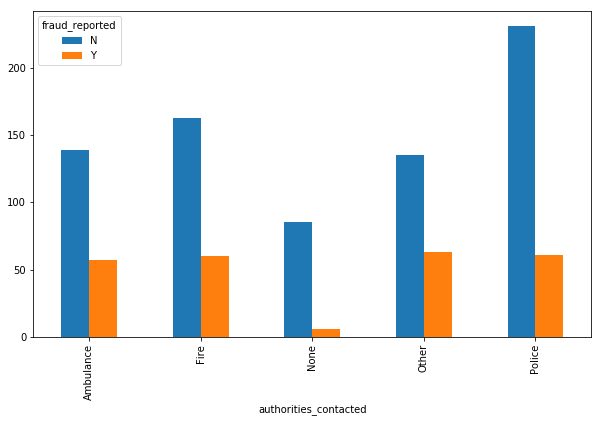

In [22]:
pd.crosstab(data.authorities_contacted,data.fraud_reported).plot(kind='bar',figsize=(10,6))

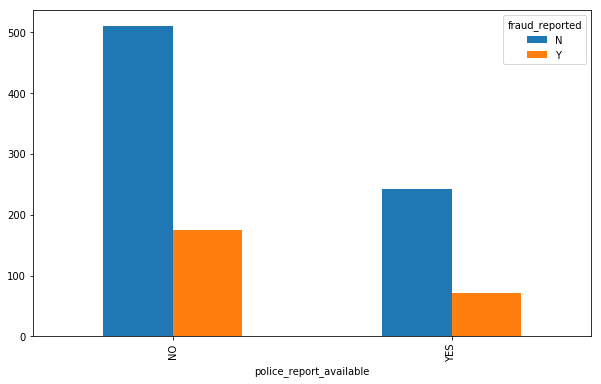

In [23]:
pd.crosstab(data.police_report_available,data.fraud_reported).plot(kind='bar',figsize=(10,6))

In [24]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported',
       'months_as_customer_bins', 'age_bins', 'policy_annual_premium_bins',
       'umbrella_limit_bins'],
      dtype='object')

In [25]:
# Lets drop some more columns we have added and are not so relevant for our modelling

data=data.drop(labels=['insured_education_level', 'insured_occupation','insured_relationship','authorities_contacted','months_as_customer_bins', 'age_bins', 
                       'policy_annual_premium_bins','umbrella_limit_bins','police_report_available'],axis=1)

In [26]:
data.shape

(1000, 21)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severity              1000 non-null object
number_of_vehicles_involved    1000 non-null int64
property_damage                1000 non-null object
bodily_injuries                1000 non-null int64
witnesses                      1000 non-null int64
total_claim_amount             1000 non-null int64
injury_claim       

In [28]:
# segregating all the categorical variables together

data_cat=data[['policy_csl','insured_sex','incident_type','collision_type','incident_severity',
        'property_damage']].copy()
data_cat.describe()

,policy_csl,insured_sex,incident_type,collision_type,incident_severity,property_damage
count,1000,1000,1000,1000,1000,1000
unique,3,2,4,3,4,2
top,250/500,FEMALE,Multi-vehicle Collision,Rear Collision,Minor Damage,NO
freq,351,537,419,470,354,698


In [29]:
#convert the categorical variables to numerical

data_cat = pd.get_dummies(data_cat)
data_cat.head()

,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_NO,property_damage_YES
0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0


In [30]:
data_remain=data.drop(labels=['policy_csl','insured_sex','incident_type','collision_type','incident_severity',
                              'property_damage'],axis=1)

In [31]:
data_remain.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,N


In [32]:
# Concat both the numerical and categorical features together

data_final= pd.concat([data_remain,data_cat], axis= 1)
data_final.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_NO,property_damage_YES
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,0,0,0,1,1,0,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,...,0,0,1,0,0,1,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,...,0,1,0,0,1,0,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [33]:
# Segregate the feature and target variables

X = data_final.drop(labels='fraud_reported',axis=1)
y = data_final['fraud_reported']

In [34]:
# Use the Label Encoder to convert the categorical feature to numerical value

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y  = le.fit_transform(y)

In [35]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X.shape

(1000, 32)

In [36]:
# Segregate the train and test set

from sklearn.model_selection import train_test_split, KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Finding the best fitted model

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
# appending all the models in a list

models=[]
results=[]
names=[]

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=19)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=19, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', d

In [46]:
#fitting the each model on the train set

for name,model in models:
    k_folds = KFold(n_splits=15, random_state=1)
    cv_score= cross_val_score(model,train_X,y=train_y,cv=k_folds,scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_score.mean()*100, cv_score.std()))
    

LR: 78.566142 (0.057923)
KNN: 74.125809 (0.055677)
DT: 69.013259 (0.064518)
NB: 68.584644 (0.078485)
SVM: 79.845822 (0.055299)
RFC: 76.703669 (0.050328)


In [48]:
# Since Logistic Regression is the good fitted model, we can check the predcition with this

lr=LogisticRegression()
lr.fit(train_X,train_y)
lr_predicted=lr.predict(test_X)
lr_score=accuracy_score(test_y,lr_predicted)

print ('LR Model :')
print ('Accuracy score : %.2f' %(lr_score*100))
print ('Classfication report : ')
print (classification_report(test_y,lr_predicted))
print ('confusion_matrix : ')
print (confusion_matrix(test_y,lr_predicted))

LR Model :
Accuracy score : 82.67
Classfication report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       226
           1       0.67      0.59      0.63        74

   micro avg       0.83      0.83      0.83       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.82      0.83      0.82       300

confusion_matrix : 
[[204  22]
 [ 30  44]]
